In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='dark')
# sns.set(style="ticks", context="talk")
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# Save global data as CSV to use for radial graidents
sf_lg12_global_df= pd.read_csv('/Users/mmckay/Desktop/research/BreakBRD_LG12_analysis_repo/lg12_dn4000cut_sf_qc_superdf/sf_lg12_global_df.csv')
qc_lg12_global_df= pd.read_csv('/Users/mmckay/Desktop/research/BreakBRD_LG12_analysis_repo/lg12_dn4000cut_sf_qc_superdf/qc_lg12_global_df.csv')
bbrd_global_df = pd.read_csv('/Users/mmckay/Desktop/research/BreakBRD_LG12_analysis_repo/global_merged_dat/bbrd_global_db.csv')
all_lg12_global_df= pd.read_csv('/Users/mmckay/Desktop/research/BreakBRD_LG12_analysis_repo/global_merged_dat/lg12_global_db.csv')

print(len(sf_lg12_global_df), len(qc_lg12_global_df))

# remove bbrd sample from
sf_lg12_global_dfv1 = sf_lg12_global_df[~sf_lg12_global_df.plateifu.isin(bbrd_global_df['plateifu'].tolist())]
qc_lg12_global_dfv1 = qc_lg12_global_df[~qc_lg12_global_df.plateifu.isin(bbrd_global_df['plateifu'].tolist())]
all_lg12_global_dfv1 = all_lg12_global_df[~all_lg12_global_df.plateifu.isin(bbrd_global_df['plateifu'].tolist())]
print(len(sf_lg12_global_dfv1), len(qc_lg12_global_dfv1))

143 89
130 89


/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


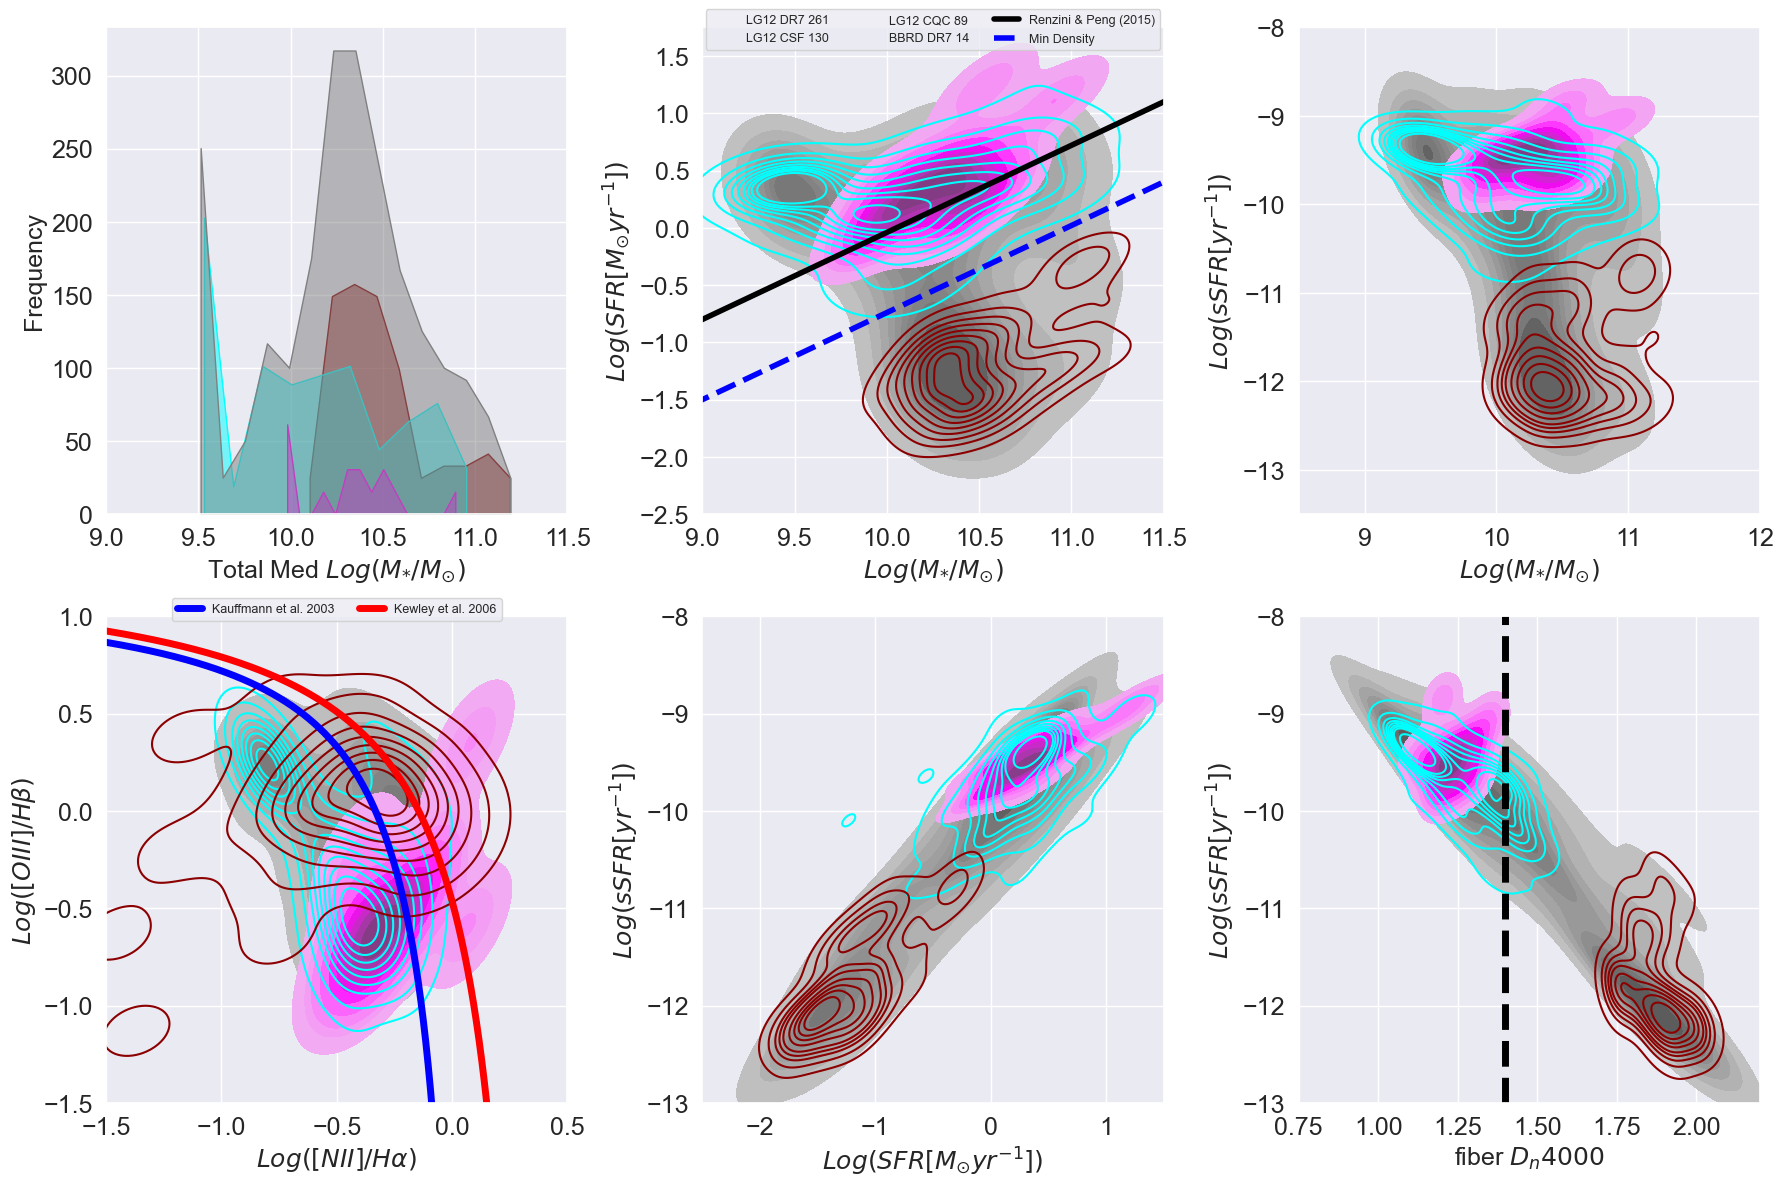

In [5]:
fig, ((ax0, ax1, ax2),(ax3, ax4, ax5)) = plt.subplots(2,3, figsize=(18,12), dpi=100)

# Ax0
sns.histplot(data=qc_lg12_global_dfv1, x='Mstarmed_SDSStotlgm', element="poly", bins=10, label=r'BBRD Total Median $Log(M_{*}/M_{\odot})$', ax=ax0, color='darkred', alpha=0.5, stat='frequency', kde=False, fill=True)
sns.histplot(data=sf_lg12_global_dfv1, x='Mstarmed_SDSStotlgm', element="poly", bins=10, label=r'LG12 Total Median $Log(M_{*}/M_{\odot})$', ax=ax0, color='cyan', alpha=0.5, stat='frequency', kde=False, fill=True)
sns.histplot(data=bbrd_global_df, x='Mstarmed_SDSStotlgm', element="poly", bins=15, label=r'BBRD Total Median $Log(M_{*}/M_{\odot})$', ax=ax0, color='magenta', alpha=0.5, stat='frequency', kde=False, fill=True)
sns.histplot(data=all_lg12_global_dfv1, x='Mstarmed_SDSStotlgm', element="poly", bins=15, label=r'LG12 Total Median $Log(M_{*}/M_{\odot})$', ax=ax0, color='grey', alpha=0.5, stat='frequency', kde=False, fill=True)

ax0.grid(True)
ax0.tick_params(axis='x', labelsize=18)
ax0.tick_params(axis='y', labelsize=18)
ax0.set_ylabel('Frequency', fontsize=18)
ax0.set_xlabel(r'Total Med $Log(M_{*}/M_{\odot})$', fontsize=18)
ax0.set_xlim(9.0, 11.5)

# Ax1
sns.kdeplot(data=all_lg12_global_dfv1, x='Mstarmed_SDSStotlgm', y='totalSFR_Med', shade=True, thresh=0.05, ax=ax1, legend=True, levels=10, color='grey', label='LG12 DR7 {}'.format(len(all_lg12_global_dfv1)))
sns.kdeplot(data=sf_lg12_global_dfv1, x='Mstarmed_SDSStotlgm', y='totalSFR_Med', shade=None, thresh=0.05, ax=ax1, legend=True, levels=10, color='cyan', label='LG12 CSF {}'.format(len(sf_lg12_global_dfv1)))
sns.kdeplot(data=qc_lg12_global_dfv1, x='Mstarmed_SDSStotlgm', y='totalSFR_Med', shade=None, thresh=0.05, ax=ax1, legend=True, levels=10, color='darkred', label='LG12 CQC {}'.format(len(qc_lg12_global_dfv1)))
sns.kdeplot(data=bbrd_global_df, x='Mstarmed_SDSStotlgm', y='totalSFR_Med', shade=True, thresh=0.05, ax=ax1, legend=True, levels=10, color='magenta', label='BBRD DR7 {}'.format(len(bbrd_global_df)))

# sns.scatterplot(data=sf_lg12_global_dfv1, x='Mstarmed_SDSStotlgm', y='totalSFR_Med', color='cyan', ax=ax1, label='LG12 CSF')
# sns.scatterplot(data=qc_lg12_global_dfv1, x='Mstarmed_SDSStotlgm', y='totalSFR_Med', color='darkred', ax=ax1, label='LG12 CQC')
# sns.scatterplot(data=bbrd_global_df, x='Mstarmed_SDSStotlgm', y='totalSFR_Med', color='magenta', ax=ax1, label='BBRD')

logm_list = np.arange(8.5, 12.6, 0.1)
rp15_sfms_fit = 0.76 * logm_list - 7.64
b20_sfms_fit = 0.9 * logm_list - 9.57
sns.lineplot(x=logm_list, y=rp15_sfms_fit, ax=ax1, color='black', label='Renzini & Peng (2015)', lw=4)
sns.lineplot(x=logm_list, y=rp15_sfms_fit-0.70, ax=ax1, color='blue', label='Min Density', linestyle='--', lw=4)
# ax1.plot(data=logm_list, x=, b20_sfms_fit, color='teal', label='Bluck et al 2020 ridge-line')
# ax1.plot(data=logm_list, x=, b20_sfms_fit-0.85, color='teal', label='Min density Bluck 2020', linestyle='--')
ax1.set_xlim(9.0, 11.5)
ax1.set_ylim(-2.5, 1.75)
ax1.grid(True)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_xlabel(r'$Log(M_{*}/M_{\odot})$', fontsize=18)
ax1.set_ylabel(r'$Log(SFR[M_{\odot}yr^{-1}])$', fontsize=18)
ax1.legend(fontsize='9', ncol=3, loc='upper center', bbox_to_anchor=(0.5, 1.05), fancybox=True)


#Ax2
sns.kdeplot(data=all_lg12_global_dfv1, x='Mstarmed_SDSStotlgm', y='fibsSFR_med_all', shade=True, levels=10, thresh=0.05, ax=ax2, color='grey')
sns.kdeplot(data=sf_lg12_global_dfv1, x='Mstarmed_SDSStotlgm', y='fibsSFR_med_all', shade=False, levels=10, thresh=0.05, ax=ax2, color='cyan')
sns.kdeplot(data=qc_lg12_global_dfv1, x='Mstarmed_SDSStotlgm', y='fibsSFR_med_all', shade=False, levels=10, thresh=0.05, ax=ax2, color='darkred')
sns.kdeplot(data=bbrd_global_df, x='Mstarmed_SDSStotlgm', y='fibsSFR_med_all', shade=True, levels=10, thresh=0.05, ax=ax2, color='magenta')




# sns.scatterplot(data=sf_lg12_global_df, x='Mstarmed_SDSStotlgm', y='fibsSFR_med_all', color='orange', ax=ax2)
# sns.scatterplot(data=bbrd_global_df, x='Mstarmed_SDSStotlgm', y='fibsSFR_med_all', color='teal', ax=ax2)
ax2.grid(True)
ax2.set_xlim(8.5, 12)
ax2.set_ylim(-13.5, -8.0)
ax2.tick_params(axis='x', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_xlabel(r'$Log(M_{*}/M_{\odot})$', fontsize=18)
ax2.set_ylabel(r'$Log(sSFR[yr^{-1}])$', fontsize=18)


# Ax3
sns.kdeplot(data=all_lg12_global_dfv1, x=np.log10(all_lg12_global_dfv1['N6584SDSS [1e-17*erg/cm^2/s]']/all_lg12_global_dfv1['HalphaSDSSline [1e-17*erg/cm^2/s]']), y=np.log10(all_lg12_global_dfv1['OIII5007SDSSline [1e-17*erg/cm^2/s]']/all_lg12_global_dfv1['HbetaSDSSline [1e-17*erg/cm^2/s]']), shade=True, levels=10, thresh=0.05, ax=ax3, color='grey')
sns.kdeplot(data=sf_lg12_global_dfv1, x=np.log10(sf_lg12_global_dfv1['N6584SDSS [1e-17*erg/cm^2/s]']/sf_lg12_global_dfv1['HalphaSDSSline [1e-17*erg/cm^2/s]']), y=np.log10(sf_lg12_global_dfv1['OIII5007SDSSline [1e-17*erg/cm^2/s]']/sf_lg12_global_dfv1['HbetaSDSSline [1e-17*erg/cm^2/s]']), shade=False, levels=10, thresh=0.05, ax=ax3, color='cyan')
sns.kdeplot(data=qc_lg12_global_dfv1, x=np.log10(qc_lg12_global_dfv1['N6584SDSS [1e-17*erg/cm^2/s]']/qc_lg12_global_dfv1['HalphaSDSSline [1e-17*erg/cm^2/s]']), y=np.log10(qc_lg12_global_dfv1['OIII5007SDSSline [1e-17*erg/cm^2/s]']/qc_lg12_global_dfv1['HbetaSDSSline [1e-17*erg/cm^2/s]']), shade=False, levels=10, thresh=0.05, ax=ax3, color='darkred')
sns.kdeplot(data=bbrd_global_df, x=np.log10(bbrd_global_df['N6584SDSS [1e-17*erg/cm^2/s]']/bbrd_global_df['HalphaSDSSline [1e-17*erg/cm^2/s]']), y=np.log10(bbrd_global_df['OIII5007SDSSline [1e-17*erg/cm^2/s]']/bbrd_global_df['HbetaSDSSline [1e-17*erg/cm^2/s]']), shade=True, levels=10, thresh=0.05, ax=ax3, color='magenta')


# Ratios
bbrd_n2ha_df = bbrd_global_df['N6584SDSS [1e-17*erg/cm^2/s]']/bbrd_global_df['HalphaSDSSline [1e-17*erg/cm^2/s]']
bbrd_o3hb_df = bbrd_global_df['OIII5007SDSSline [1e-17*erg/cm^2/s]']/bbrd_global_df['HbetaSDSSline [1e-17*erg/cm^2/s]']
lg12_n2ha_df = sf_lg12_global_dfv1['N6584SDSS [1e-17*erg/cm^2/s]']/sf_lg12_global_dfv1['HalphaSDSSline [1e-17*erg/cm^2/s]']
lg12_o3hb_df = sf_lg12_global_dfv1['OIII5007SDSSline [1e-17*erg/cm^2/s]']/sf_lg12_global_dfv1['HbetaSDSSline [1e-17*erg/cm^2/s]']


# sns.scatterplot(x=np.log10(bbrd_n2ha_df), y=np.log10(bbrd_o3hb_df), color='teal', ax=ax3)
# sns.scatterplot(x=np.log10(lg12_n2ha_df), y=np.log10(lg12_o3hb_df), color='orange', ax=ax3)

n2ha_sf_range = np.linspace(-2.0, 0.045, int(1e4))
n2ha_comp_range = np.linspace(-2.0, 0.4, int(1e4))
ka03_comp = (0.61 / (n2ha_sf_range - 0.05)) + 1.3
ke01_sf = (0.61 / (n2ha_comp_range - 0.47)) + 1.19
sns.lineplot(x=n2ha_sf_range, y=ke01_sf, color='blue', ax=ax3, label='Kauffmann et al. 2003', lw=5)
sns.lineplot(x=n2ha_comp_range, y=ka03_comp, color='red', ax=ax3, label='Kewley et al. 2006', lw=5)
ax3.set_xlim(-1.5, 0.5)
ax3.set_ylim(-1.5, 1.0)
ax3.tick_params(axis='x', labelsize=18)
ax3.tick_params(axis='y', labelsize=18)
ax3.grid(True)
ax3.set_xlabel(r'$Log([NII]/H\alpha)$', fontsize=18)
ax3.set_ylabel(r'$Log([OIII]/H\beta)$', fontsize=18)
ax3.legend(fontsize='9', ncol=2, loc='upper center', bbox_to_anchor=(0.5, 1.05), fancybox=True)


# Ax4
sns.kdeplot(data=all_lg12_global_dfv1, x='totalSFR_Med', y='fibsSFR_med_all', shade=True, levels=10, thresh=0.05, ax=ax4, color='grey')
sns.kdeplot(data=sf_lg12_global_dfv1, x='totalSFR_Med', y='fibsSFR_med_all', shade=False, levels=10, thresh=0.05, ax=ax4, color='cyan')
sns.kdeplot(data=qc_lg12_global_dfv1, x='totalSFR_Med', y='fibsSFR_med_all', shade=False, levels=10, thresh=0.05, ax=ax4, color='darkred')
sns.kdeplot(data=bbrd_global_df, x='totalSFR_Med', y='fibsSFR_med_all', shade=True, levels=10, thresh=0.05, ax=ax4, color='magenta')

# sns.scatterplot(data=sf_lg12_global_df, x='totalSFR_Med', y='fibsSFR_med_all', color='orange', ax=ax4)
# sns.scatterplot(data=bbrd_global_df, x='totalSFR_Med', y='fibsSFR_med_all', color='teal', ax=ax4)
# logm_list = np.arange(8.5, 12.6, 0.1)
# gmag_rmag = 0.6 - 0.06*(logm_list - 10)
# ax4.plot(data=logm_list, x=, gmag_rmag, color='black')
ax4.grid(True)
ax4.set_xlim(-2.5, 1.5)
ax4.set_ylim(-13, -8.0)
ax4.tick_params(axis='x', labelsize=18)
ax4.tick_params(axis='y', labelsize=18)
ax4.set_xlabel(r'$Log(SFR[M_{\odot}yr^{-1}])$', fontsize=18)
ax4.set_ylabel(r'$Log(sSFR[yr^{-1}])$', fontsize=18)


# Ax5
sns.kdeplot(data=all_lg12_global_dfv1, x='Dn4000SDSSindx ', y='fibsSFR_med_all', shade=True, levels=10, thresh=0.05, ax=ax5, color='grey')
sns.kdeplot(data=sf_lg12_global_dfv1, x='Dn4000SDSSindx ', y='fibsSFR_med_all', shade=False, levels=10, thresh=0.05, ax=ax5, color='cyan')
sns.kdeplot(data=qc_lg12_global_dfv1, x='Dn4000SDSSindx ', y='fibsSFR_med_all', shade=False, levels=10, thresh=0.05, ax=ax5, color='darkred')
sns.kdeplot(data=bbrd_global_df, x='Dn4000SDSSindx ', y='fibsSFR_med_all', shade=True, levels=10, thresh=0.05, ax=ax5, color='magenta')
# sns.kdeplot(data=all_lg12_global_dfv1, x='Dn4000SDSSindx ', y='fibsSFR_med_all', shade=True, thresh=0.05, ax=ax5, color='teal')
# sns.scatterplot(data=sf_lg12_global_df, x='Dn4000SDSSindx ', y='fibsSFR_med_all', color='orange', ax=ax5)
# for i, plateifu in enumerate(sf_lg12_global_df['plateifu']):
#     # print(i, plateifu, mass)
#     ax5.text(sf_lg12_global_df['Dn4000SDSSindx'][i], sf_lg12_global_df['fibsSFR_med_all'][i], plateifu, horizontalalignment='center', verticalalignment='center', fontsize=12)
ax5.axvline(1.4, color='black', linestyle='--', lw=5)
ax5.grid(True)
ax5.set_ylabel(r'$Log(sSFR[yr^{-1}])$', fontsize=18)
ax5.set_xlabel(r'fiber $D_{n}4000$', fontsize=18)
ax5.set_xlim(0.75, 2.2)
ax5.set_ylim(-13, -8.0)
ax5.tick_params(axis='x', labelsize=18)
ax5.tick_params(axis='y', labelsize=18)


plt.tight_layout()
# plt.savefig('/Users/mmckay/Desktop/research/FMR_MZR/lg12_MMfits/lg12_ifu_global_subplot.jpeg')
plt.savefig('/Users/mmckay/Desktop/research/BreakBRD_LG12_analysis_repo/lg12_dn4000cut_sf_qc_superdf/lg12_ifu_global_subplot.pdf', dpi=300)

In [ ]:
# graph = sns.jointplot(x=bbrd_global_df['Dn4000SDSSindx '], y=bbrd_global_df['D4000SDSSindx '], color='blue')

# graph.x = sf_lg12_global_dfv1['Dn4000SDSSindx ']
# graph.y = sf_lg12_global_dfv1['D4000SDSSindx ']
# graph.plot_joint(plt.scatter, marker='o', c='coral', s=50)


In [ ]:
cols_to_plot = ['Dn4000SDSSindx ', 'sSFR_med_all ', 'fibsSFR_med_all', 'fibSFR_med_all', 'Mstarmed_SDSStotlgm', 'log_SFR_Ha'] # explicitly add the column "Outcome" to your list of columns to plot
sns.pairplot(sf_lg12_global_dfv1[cols_to_plot], markers=["o"], corner=True)
sns.pairplot(qc_lg12_global_dfv1[cols_to_plot], markers=["x"], corner=True)
sns.pairplot(bbrd_global_df[cols_to_plot], markers=["+"], corner=True)

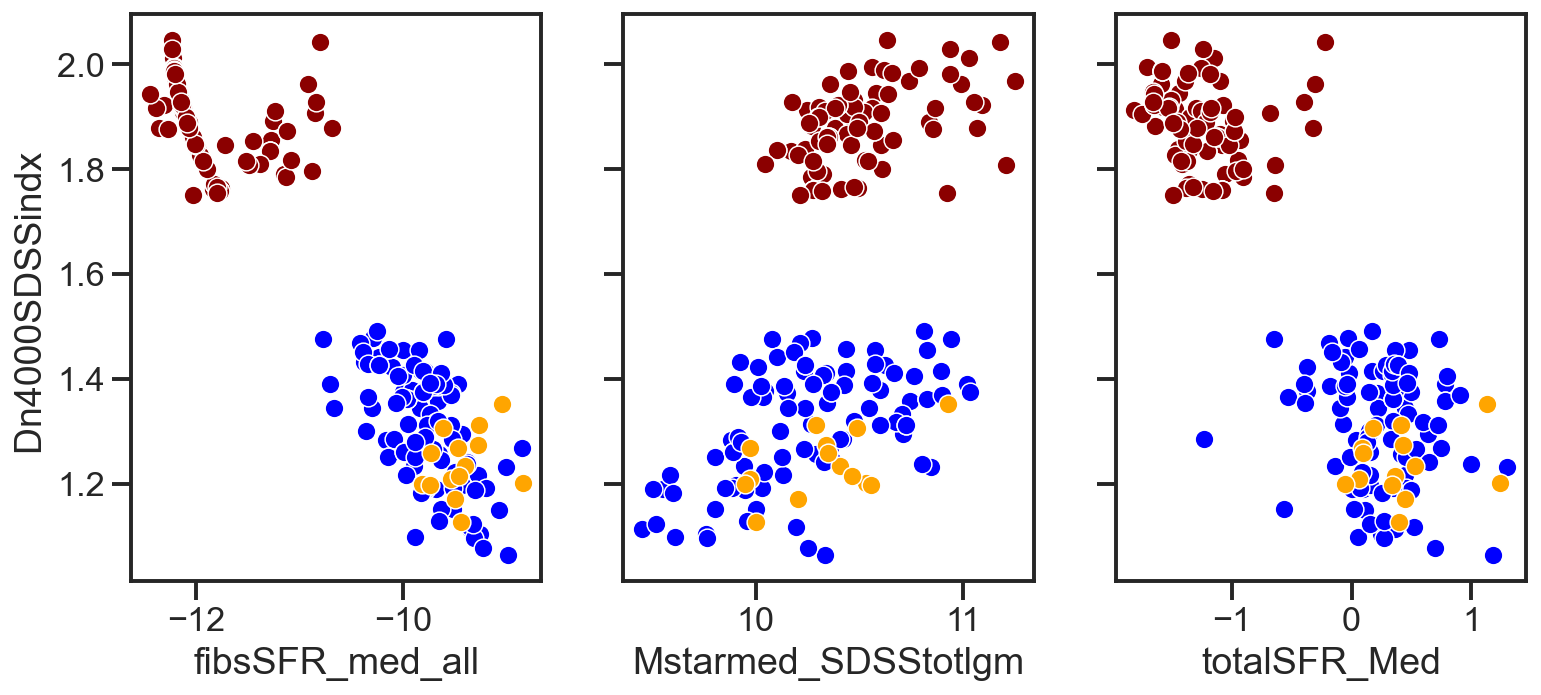

In [5]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(12, 5), sharey=True, dpi=150)

sns.scatterplot(x=sf_lg12_global_dfv1['fibsSFR_med_all'], y=sf_lg12_global_dfv1['Dn4000SDSSindx '], ax=ax0, color='blue')
sns.scatterplot(x=qc_lg12_global_dfv1['fibsSFR_med_all'], y=qc_lg12_global_dfv1['Dn4000SDSSindx '], ax=ax0, color='darkred')
sns.scatterplot(x=bbrd_global_df['fibsSFR_med_all'], y=bbrd_global_df['Dn4000SDSSindx '], ax=ax0, color='orange')

sns.scatterplot(x=sf_lg12_global_dfv1['Mstarmed_SDSStotlgm'], y=sf_lg12_global_dfv1['Dn4000SDSSindx '], ax=ax1, color='blue')
sns.scatterplot(x=qc_lg12_global_dfv1['Mstarmed_SDSStotlgm'], y=qc_lg12_global_dfv1['Dn4000SDSSindx '], ax=ax1, color='darkred')
sns.scatterplot(x=bbrd_global_df['Mstarmed_SDSStotlgm'], y=bbrd_global_df['Dn4000SDSSindx '], ax=ax1, color='orange')

sns.scatterplot(x=sf_lg12_global_dfv1['totalSFR_Med'], y=sf_lg12_global_dfv1['Dn4000SDSSindx '], ax=ax2, color='blue')
sns.scatterplot(x=qc_lg12_global_dfv1['totalSFR_Med'], y=qc_lg12_global_dfv1['Dn4000SDSSindx '], ax=ax2, color='darkred')
sns.scatterplot(x=bbrd_global_df['totalSFR_Med'], y=bbrd_global_df['Dn4000SDSSindx '], ax=ax2, color='orange')

plt.show()

/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

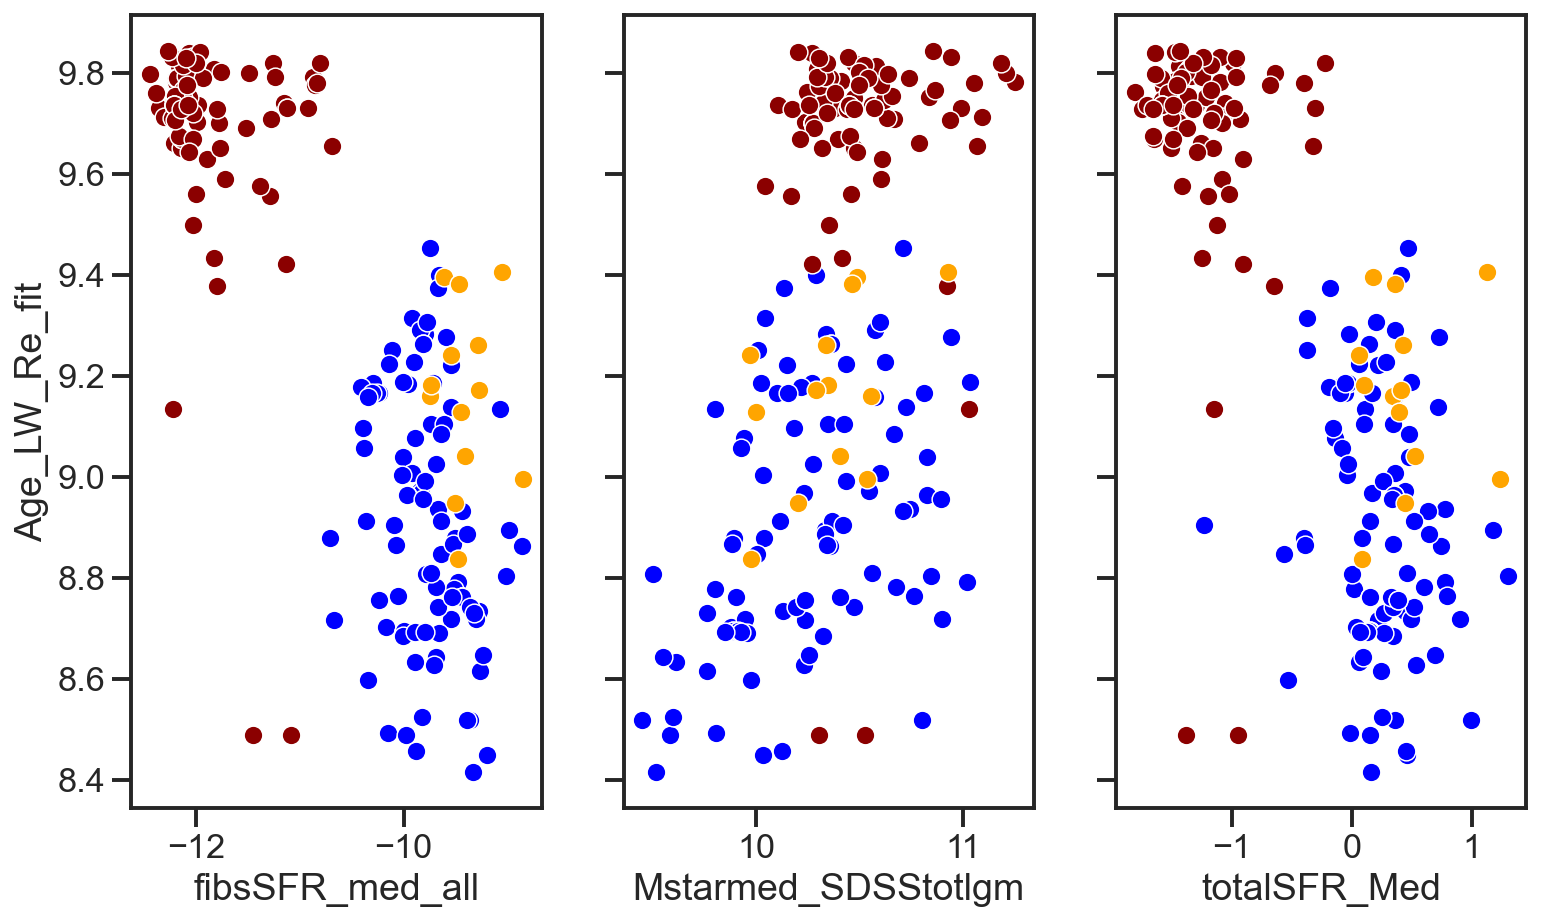

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(12, 7), sharey=True, dpi=150)

sns.scatterplot(sf_lg12_global_dfv1['fibsSFR_med_all'], sf_lg12_global_dfv1['Age_LW_Re_fit'], ax=ax0, color='blue')
sns.scatterplot(qc_lg12_global_dfv1['fibsSFR_med_all'], qc_lg12_global_dfv1['Age_LW_Re_fit'], ax=ax0, color='darkred')
sns.scatterplot(bbrd_global_df['fibsSFR_med_all'], bbrd_global_df['Age_LW_Re_fit'], ax=ax0, color='orange')

sns.scatterplot(sf_lg12_global_dfv1['Mstarmed_SDSStotlgm'], sf_lg12_global_dfv1['Age_LW_Re_fit'], ax=ax1, color='blue')
sns.scatterplot(qc_lg12_global_dfv1['Mstarmed_SDSStotlgm'], qc_lg12_global_dfv1['Age_LW_Re_fit'], ax=ax1, color='darkred')
sns.scatterplot(bbrd_global_df['Mstarmed_SDSStotlgm'], bbrd_global_df['Age_LW_Re_fit'], ax=ax1, color='orange')

sns.scatterplot(sf_lg12_global_dfv1['totalSFR_Med'], sf_lg12_global_dfv1['Age_LW_Re_fit'], ax=ax2, color='blue')
sns.scatterplot(qc_lg12_global_dfv1['totalSFR_Med'], qc_lg12_global_dfv1['Age_LW_Re_fit'], ax=ax2, color='darkred')
sns.scatterplot(bbrd_global_df['totalSFR_Med'], bbrd_global_df['Age_LW_Re_fit'], ax=ax2, color='orange')

plt.show()

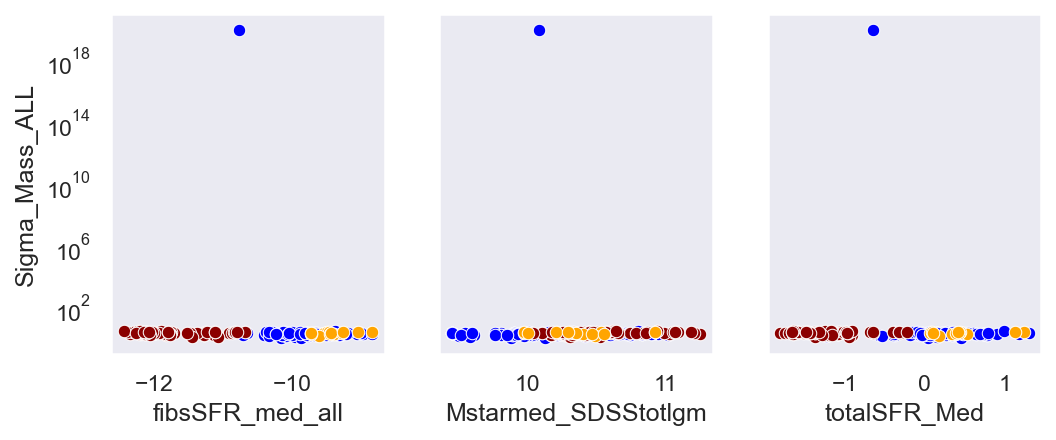

In [10]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(8, 3), sharey=True, dpi=150)

sns.scatterplot(x=sf_lg12_global_dfv1['fibsSFR_med_all'], y=sf_lg12_global_dfv1['Sigma_Mass_ALL'], ax=ax0, color='blue')
sns.scatterplot(x=qc_lg12_global_dfv1['fibsSFR_med_all'], y=qc_lg12_global_dfv1['Sigma_Mass_ALL'], ax=ax0, color='darkred')
sns.scatterplot(x=bbrd_global_df['fibsSFR_med_all'], y=bbrd_global_df['Sigma_Mass_ALL'], ax=ax0, color='orange')

sns.scatterplot(x=sf_lg12_global_dfv1['Mstarmed_SDSStotlgm'], y=sf_lg12_global_dfv1['Sigma_Mass_ALL'], ax=ax1, color='blue')
sns.scatterplot(x=qc_lg12_global_dfv1['Mstarmed_SDSStotlgm'], y=qc_lg12_global_dfv1['Sigma_Mass_ALL'], ax=ax1, color='darkred')
sns.scatterplot(x=bbrd_global_df['Mstarmed_SDSStotlgm'], y=bbrd_global_df['Sigma_Mass_ALL'], ax=ax1, color='orange')

sns.scatterplot(x=sf_lg12_global_dfv1['totalSFR_Med'], y=sf_lg12_global_dfv1['Sigma_Mass_ALL'], ax=ax2, color='blue')
sns.scatterplot(x=qc_lg12_global_dfv1['totalSFR_Med'], y=qc_lg12_global_dfv1['Sigma_Mass_ALL'], ax=ax2, color='darkred')
sns.scatterplot(x=bbrd_global_df['totalSFR_Med'], y=bbrd_global_df['Sigma_Mass_ALL'], ax=ax2, color='orange')

plt.yscale('log')
# plt.ylim(1e-1, 1e2)
plt.show()

/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

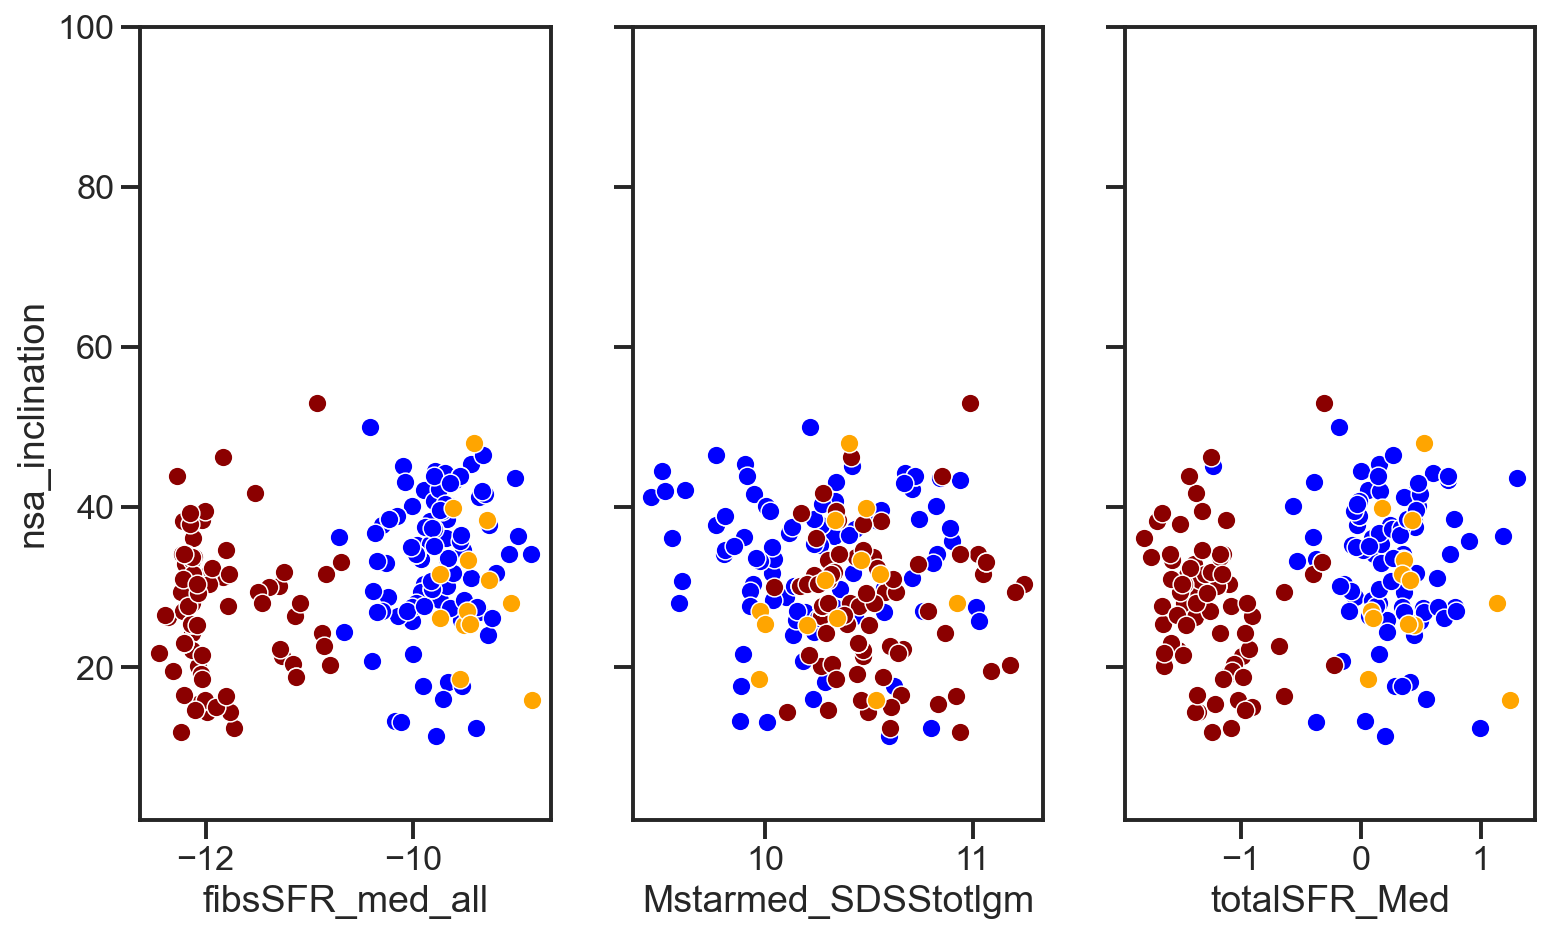

In [54]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(12, 7), sharey=True, dpi=150)

sns.scatterplot(sf_lg12_global_dfv1['fibsSFR_med_all'], sf_lg12_global_dfv1['nsa_inclination'], ax=ax0, color='blue')
sns.scatterplot(qc_lg12_global_dfv1['fibsSFR_med_all'], qc_lg12_global_dfv1['nsa_inclination'], ax=ax0, color='darkred')
sns.scatterplot(bbrd_global_df['fibsSFR_med_all'], bbrd_global_df['nsa_inclination'], ax=ax0, color='orange')

sns.scatterplot(sf_lg12_global_dfv1['Mstarmed_SDSStotlgm'], sf_lg12_global_dfv1['nsa_inclination'], ax=ax1, color='blue')
sns.scatterplot(qc_lg12_global_dfv1['Mstarmed_SDSStotlgm'], qc_lg12_global_dfv1['nsa_inclination'], ax=ax1, color='darkred')
sns.scatterplot(bbrd_global_df['Mstarmed_SDSStotlgm'], bbrd_global_df['nsa_inclination'], ax=ax1, color='orange')

sns.scatterplot(sf_lg12_global_dfv1['totalSFR_Med'], sf_lg12_global_dfv1['nsa_inclination'], ax=ax2, color='blue')
sns.scatterplot(qc_lg12_global_dfv1['totalSFR_Med'], qc_lg12_global_dfv1['nsa_inclination'], ax=ax2, color='darkred')
sns.scatterplot(bbrd_global_df['totalSFR_Med'], bbrd_global_df['nsa_inclination'], ax=ax2, color='orange')

# plt.yscale('log')
# plt.ylim(1e-1, 1e2)
plt.ylim(1, 100)
plt.show()

/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

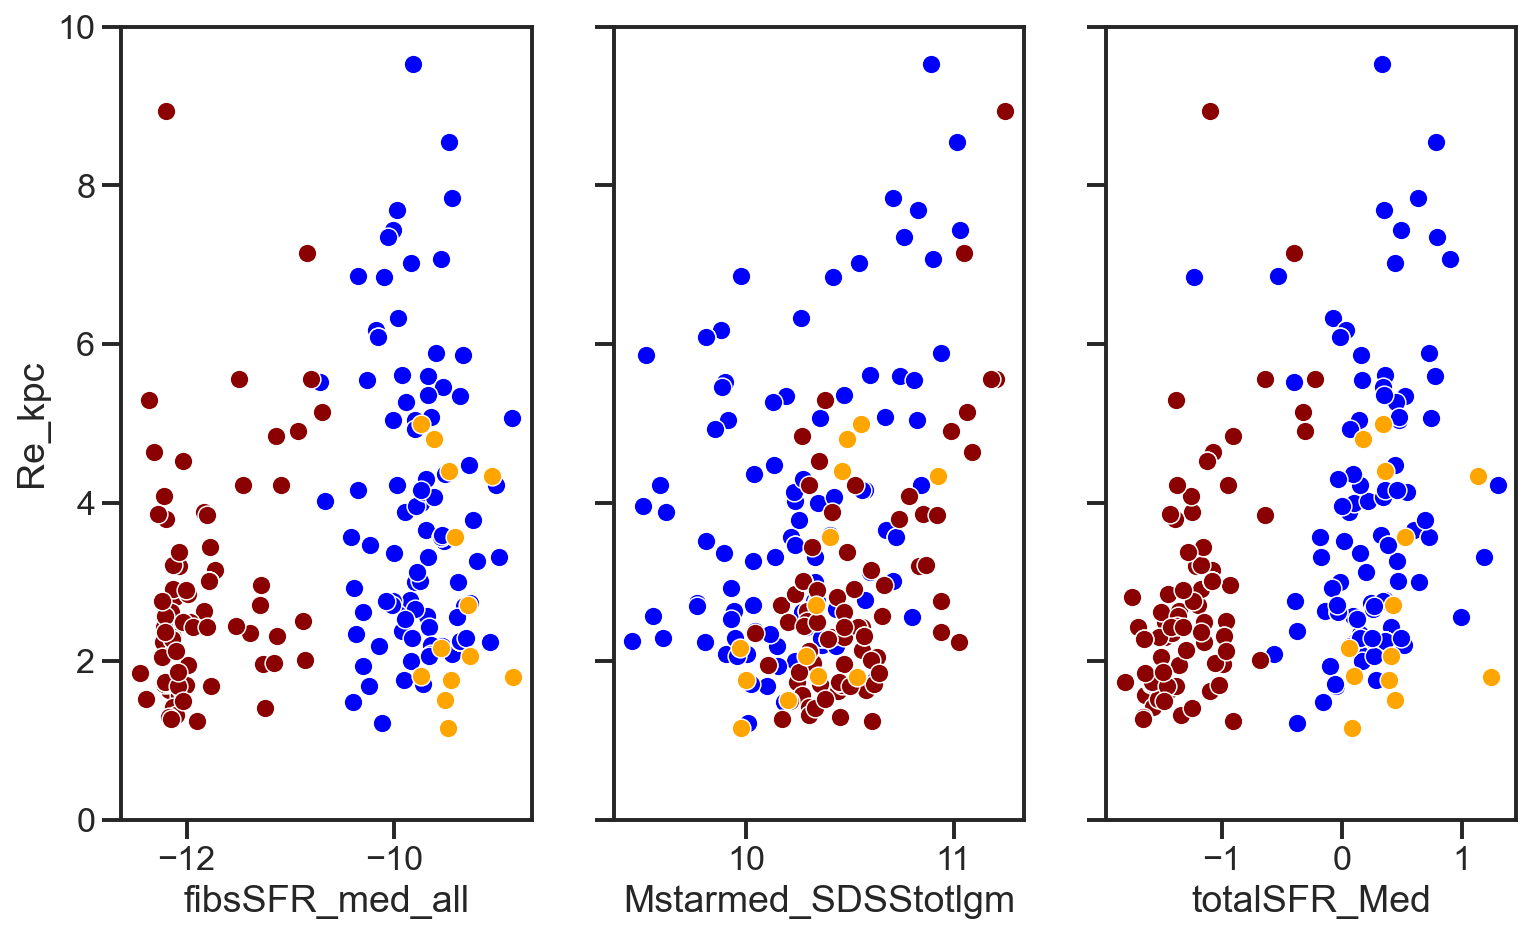

In [56]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(12, 7), sharey=True, dpi=150)

sns.scatterplot(sf_lg12_global_dfv1['fibsSFR_med_all'], sf_lg12_global_dfv1['Re_kpc'], ax=ax0, color='blue')
sns.scatterplot(qc_lg12_global_dfv1['fibsSFR_med_all'], qc_lg12_global_dfv1['Re_kpc'], ax=ax0, color='darkred')
sns.scatterplot(bbrd_global_df['fibsSFR_med_all'], bbrd_global_df['Re_kpc'], ax=ax0, color='orange')

sns.scatterplot(sf_lg12_global_dfv1['Mstarmed_SDSStotlgm'], sf_lg12_global_dfv1['Re_kpc'], ax=ax1, color='blue')
sns.scatterplot(qc_lg12_global_dfv1['Mstarmed_SDSStotlgm'], qc_lg12_global_dfv1['Re_kpc'], ax=ax1, color='darkred')
sns.scatterplot(bbrd_global_df['Mstarmed_SDSStotlgm'], bbrd_global_df['Re_kpc'], ax=ax1, color='orange')

sns.scatterplot(sf_lg12_global_dfv1['totalSFR_Med'], sf_lg12_global_dfv1['Re_kpc'], ax=ax2, color='blue')
sns.scatterplot(qc_lg12_global_dfv1['totalSFR_Med'], qc_lg12_global_dfv1['Re_kpc'], ax=ax2, color='darkred')
sns.scatterplot(bbrd_global_df['totalSFR_Med'], bbrd_global_df['Re_kpc'], ax=ax2, color='orange')

# plt.yscale('log')
# plt.ylim(1e-1, 1e2)
plt.ylim(0, 10)
plt.show()

/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

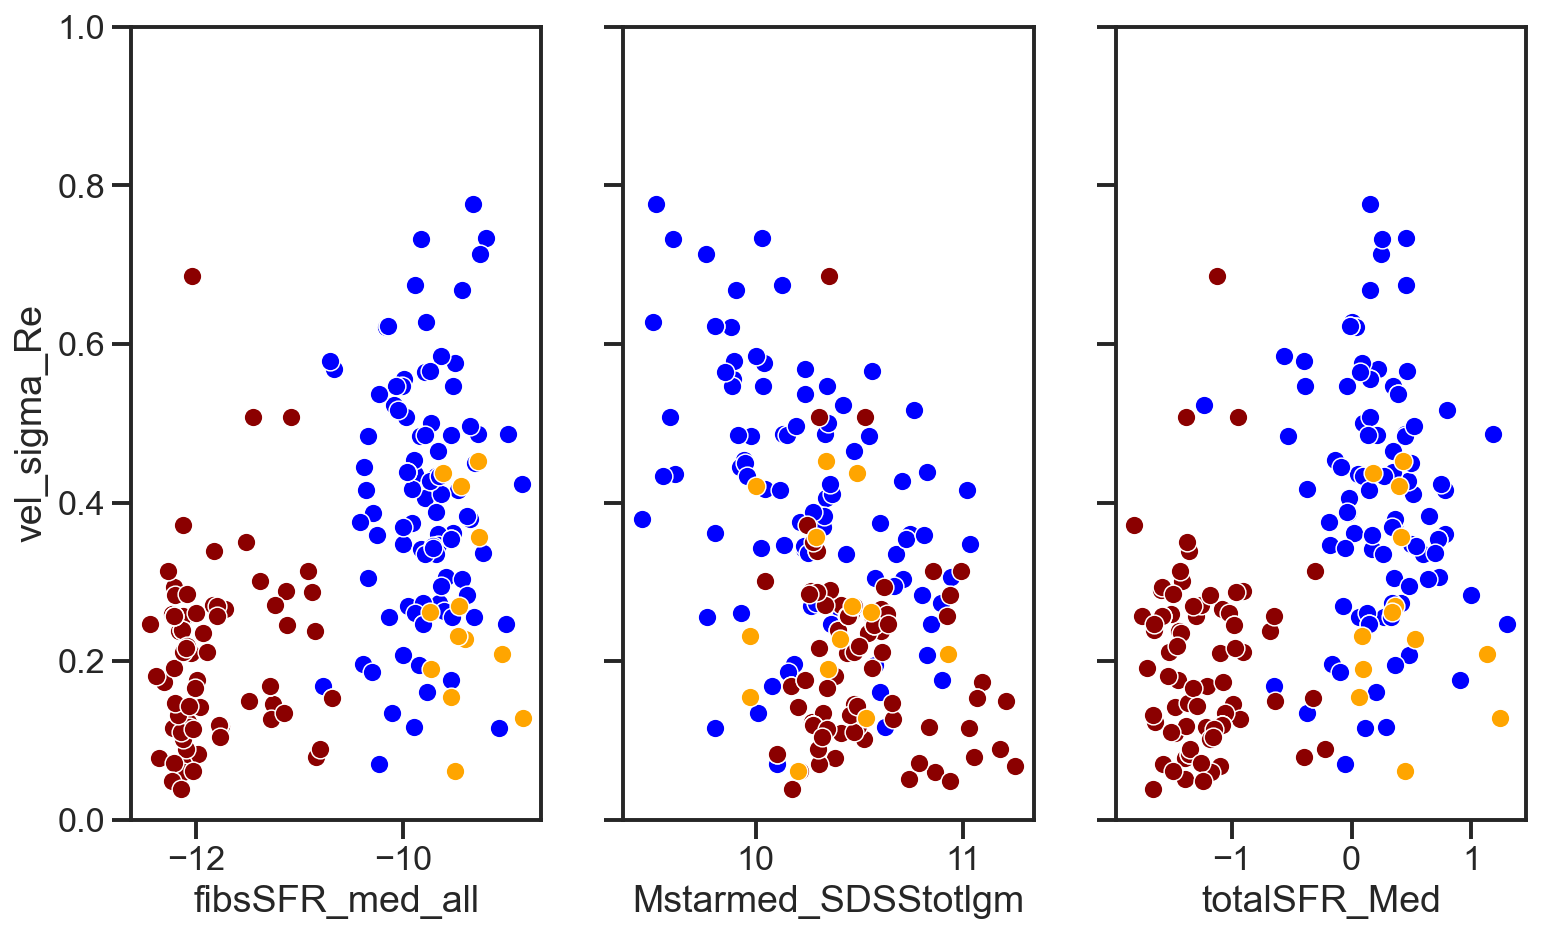

In [87]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(12, 7), sharey=True, dpi=150)

sns.scatterplot(sf_lg12_global_dfv1['fibsSFR_med_all'], sf_lg12_global_dfv1['vel_sigma_Re'], ax=ax0, color='blue')
sns.scatterplot(qc_lg12_global_dfv1['fibsSFR_med_all'], qc_lg12_global_dfv1['vel_sigma_Re'], ax=ax0, color='darkred')
sns.scatterplot(bbrd_global_df['fibsSFR_med_all'], bbrd_global_df['vel_sigma_Re'], ax=ax0, color='orange')

sns.scatterplot(sf_lg12_global_dfv1['Mstarmed_SDSStotlgm'], sf_lg12_global_dfv1['vel_sigma_Re'], ax=ax1, color='blue')
sns.scatterplot(qc_lg12_global_dfv1['Mstarmed_SDSStotlgm'], qc_lg12_global_dfv1['vel_sigma_Re'], ax=ax1, color='darkred')
sns.scatterplot(bbrd_global_df['Mstarmed_SDSStotlgm'], bbrd_global_df['vel_sigma_Re'], ax=ax1, color='orange')

sns.scatterplot(sf_lg12_global_dfv1['totalSFR_Med'], sf_lg12_global_dfv1['vel_sigma_Re'], ax=ax2, color='blue')
sns.scatterplot(qc_lg12_global_dfv1['totalSFR_Med'], qc_lg12_global_dfv1['vel_sigma_Re'], ax=ax2, color='darkred')
sns.scatterplot(bbrd_global_df['totalSFR_Med'], bbrd_global_df['vel_sigma_Re'], ax=ax2, color='orange')

# plt.yscale('log')
# plt.ylim(1e-1, 1e2)
plt.ylim(0, 1)
plt.show()

/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

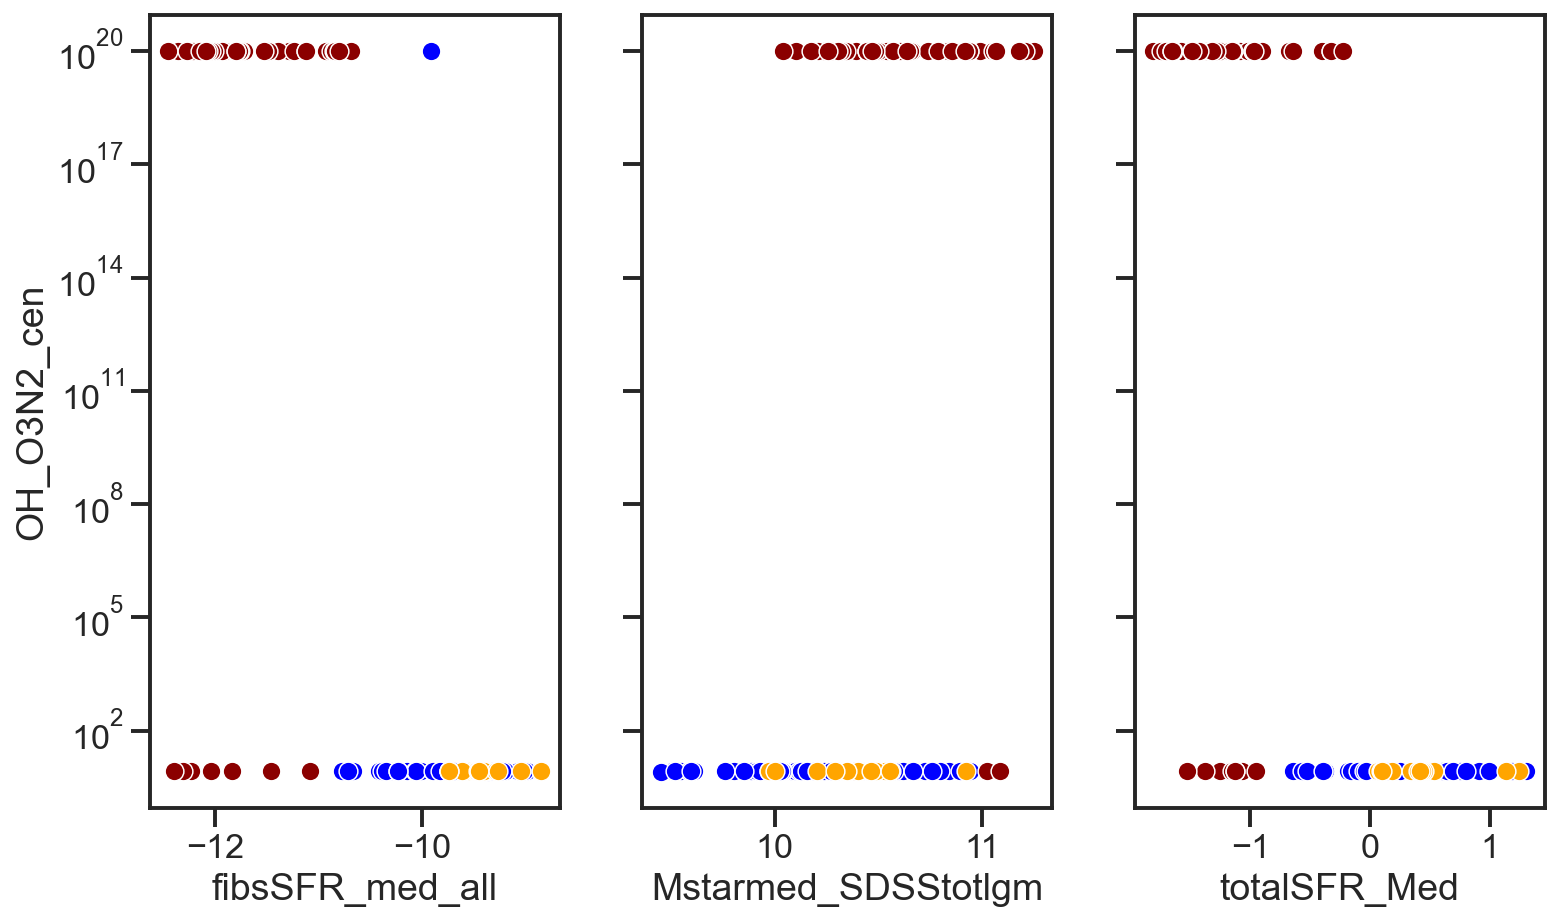

In [63]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(12, 7), sharey=True, dpi=150)

sns.scatterplot(sf_lg12_global_dfv1['fibsSFR_med_all'], sf_lg12_global_dfv1['OH_O3N2_cen'], ax=ax0, color='blue')
sns.scatterplot(qc_lg12_global_dfv1['fibsSFR_med_all'], qc_lg12_global_dfv1['OH_O3N2_cen'], ax=ax0, color='darkred')
sns.scatterplot(bbrd_global_df['fibsSFR_med_all'], bbrd_global_df['OH_O3N2_cen'], ax=ax0, color='orange')

sns.scatterplot(sf_lg12_global_dfv1['Mstarmed_SDSStotlgm'], sf_lg12_global_dfv1['OH_O3N2_cen'], ax=ax1, color='blue')
sns.scatterplot(qc_lg12_global_dfv1['Mstarmed_SDSStotlgm'], qc_lg12_global_dfv1['OH_O3N2_cen'], ax=ax1, color='darkred')
sns.scatterplot(bbrd_global_df['Mstarmed_SDSStotlgm'], bbrd_global_df['OH_O3N2_cen'], ax=ax1, color='orange')

sns.scatterplot(sf_lg12_global_dfv1['totalSFR_Med'], sf_lg12_global_dfv1['OH_O3N2_cen'], ax=ax2, color='blue')
sns.scatterplot(qc_lg12_global_dfv1['totalSFR_Med'], qc_lg12_global_dfv1['OH_O3N2_cen'], ax=ax2, color='darkred')
sns.scatterplot(bbrd_global_df['totalSFR_Med'], bbrd_global_df['OH_O3N2_cen'], ax=ax2, color='orange')

plt.yscale('log')
# plt.ylim(1e-1, 1e2)
# plt.ylim(0, 1)
plt.show()

/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

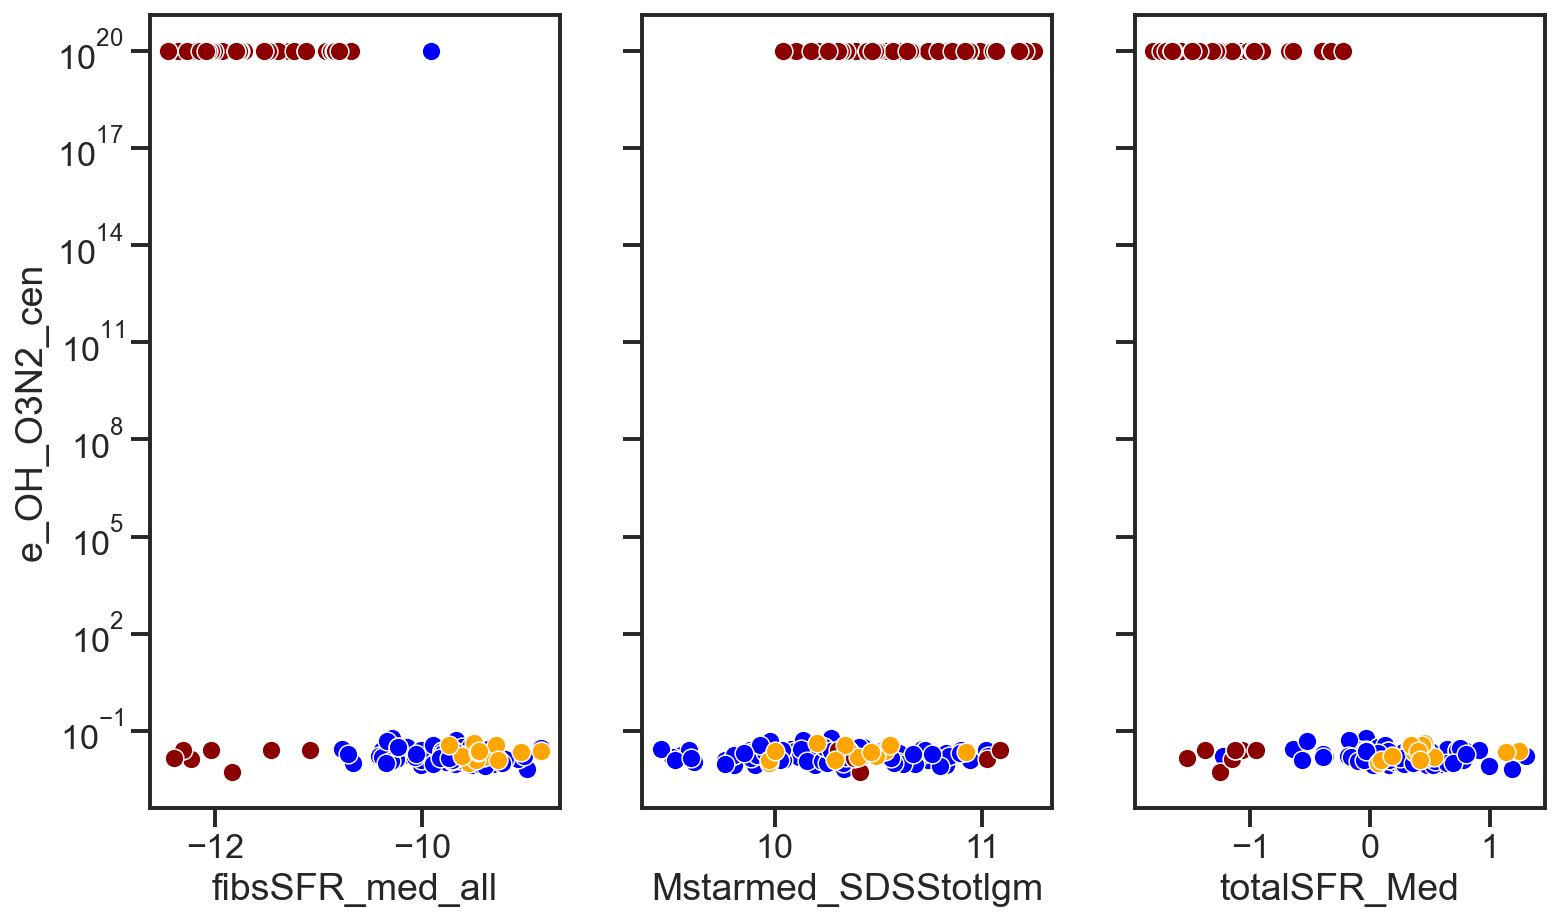

In [64]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(12, 7), sharey=True, dpi=150)

sns.scatterplot(sf_lg12_global_dfv1['fibsSFR_med_all'], sf_lg12_global_dfv1['e_OH_O3N2_cen'], ax=ax0, color='blue')
sns.scatterplot(qc_lg12_global_dfv1['fibsSFR_med_all'], qc_lg12_global_dfv1['e_OH_O3N2_cen'], ax=ax0, color='darkred')
sns.scatterplot(bbrd_global_df['fibsSFR_med_all'], bbrd_global_df['e_OH_O3N2_cen'], ax=ax0, color='orange')

sns.scatterplot(sf_lg12_global_dfv1['Mstarmed_SDSStotlgm'], sf_lg12_global_dfv1['e_OH_O3N2_cen'], ax=ax1, color='blue')
sns.scatterplot(qc_lg12_global_dfv1['Mstarmed_SDSStotlgm'], qc_lg12_global_dfv1['e_OH_O3N2_cen'], ax=ax1, color='darkred')
sns.scatterplot(bbrd_global_df['Mstarmed_SDSStotlgm'], bbrd_global_df['e_OH_O3N2_cen'], ax=ax1, color='orange')

sns.scatterplot(sf_lg12_global_dfv1['totalSFR_Med'], sf_lg12_global_dfv1['e_OH_O3N2_cen'], ax=ax2, color='blue')
sns.scatterplot(qc_lg12_global_dfv1['totalSFR_Med'], qc_lg12_global_dfv1['e_OH_O3N2_cen'], ax=ax2, color='darkred')
sns.scatterplot(bbrd_global_df['totalSFR_Med'], bbrd_global_df['e_OH_O3N2_cen'], ax=ax2, color='orange')

plt.yscale('log')
# plt.ylim(1e-1, 1e2)
# plt.ylim(0, 1)
plt.show()

/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

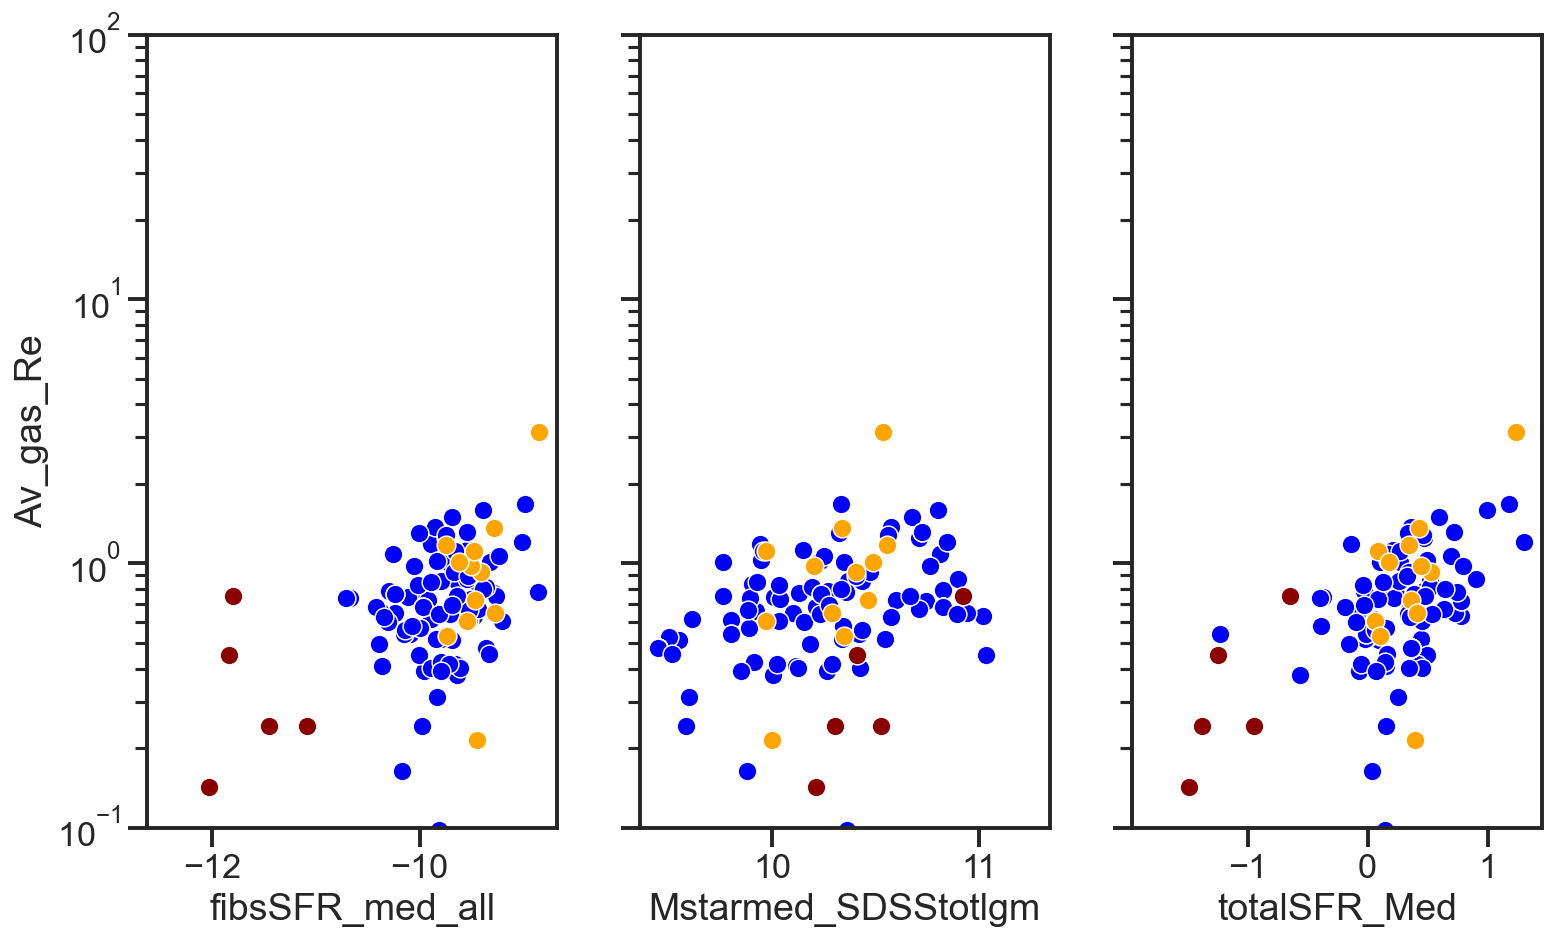

In [68]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(12, 7), sharey=True, dpi=150)

sns.scatterplot(sf_lg12_global_dfv1['fibsSFR_med_all'], sf_lg12_global_dfv1['Av_gas_Re'], ax=ax0, color='blue')
sns.scatterplot(qc_lg12_global_dfv1['fibsSFR_med_all'], qc_lg12_global_dfv1['Av_gas_Re'], ax=ax0, color='darkred')
sns.scatterplot(bbrd_global_df['fibsSFR_med_all'], bbrd_global_df['Av_gas_Re'], ax=ax0, color='orange')

sns.scatterplot(sf_lg12_global_dfv1['Mstarmed_SDSStotlgm'], sf_lg12_global_dfv1['Av_gas_Re'], ax=ax1, color='blue')
sns.scatterplot(qc_lg12_global_dfv1['Mstarmed_SDSStotlgm'], qc_lg12_global_dfv1['Av_gas_Re'], ax=ax1, color='darkred')
sns.scatterplot(bbrd_global_df['Mstarmed_SDSStotlgm'], bbrd_global_df['Av_gas_Re'], ax=ax1, color='orange')

sns.scatterplot(sf_lg12_global_dfv1['totalSFR_Med'], sf_lg12_global_dfv1['Av_gas_Re'], ax=ax2, color='blue')
sns.scatterplot(qc_lg12_global_dfv1['totalSFR_Med'], qc_lg12_global_dfv1['Av_gas_Re'], ax=ax2, color='darkred')
sns.scatterplot(bbrd_global_df['totalSFR_Med'], bbrd_global_df['Av_gas_Re'], ax=ax2, color='orange')

plt.yscale('log')
plt.ylim(1e-1, 1e2)
# plt.ylim(0, 1)
plt.show()

/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

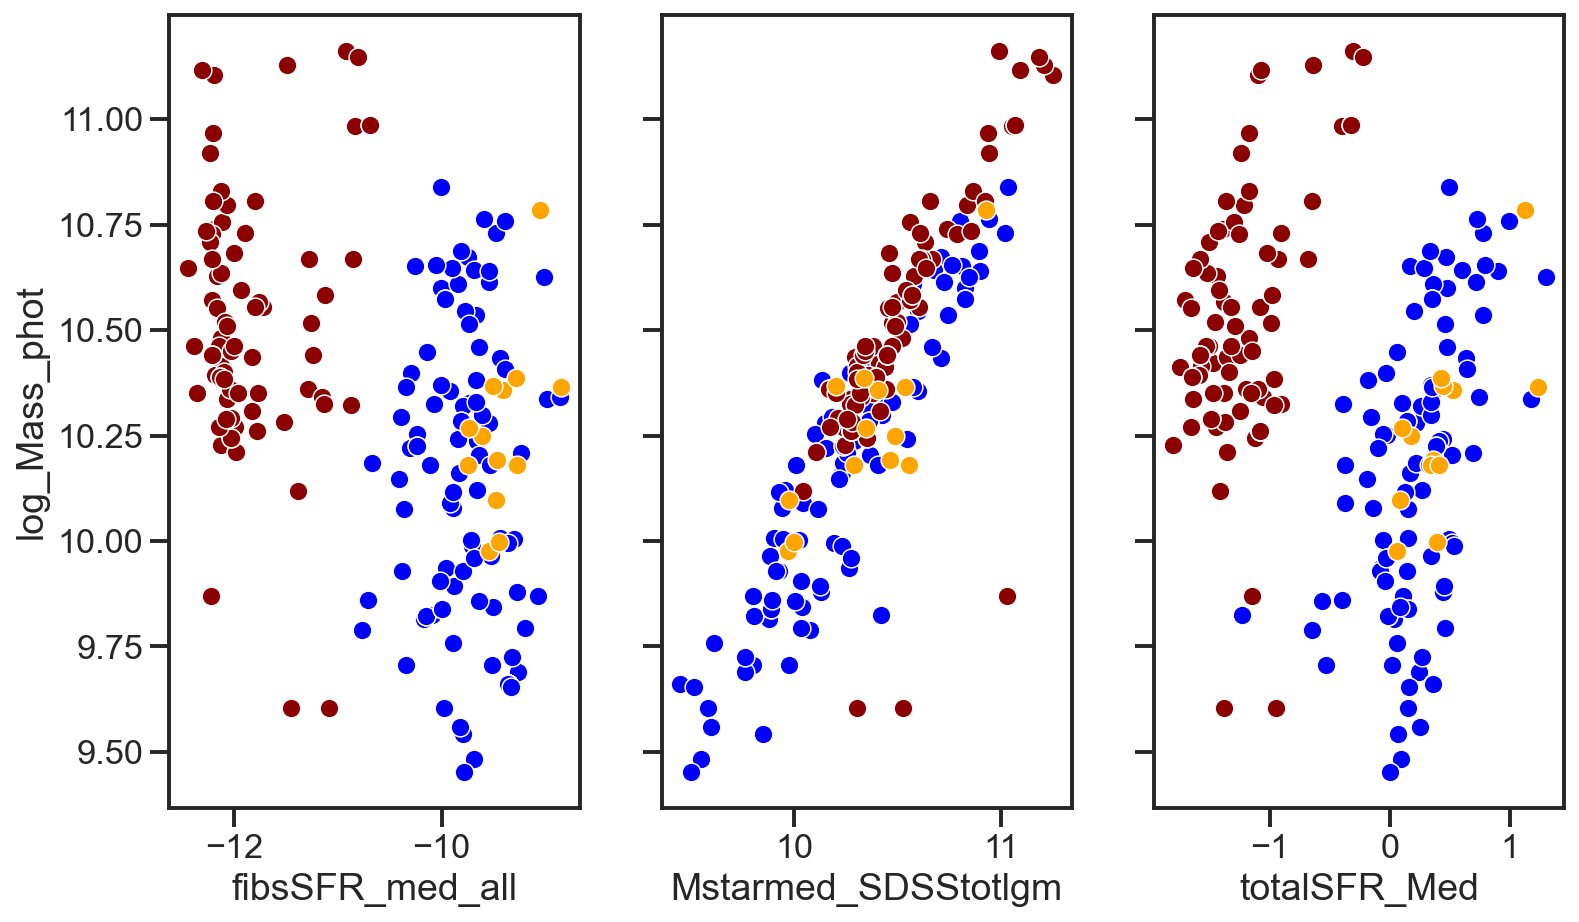

In [73]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(12, 7), sharey=True, dpi=150)

sns.scatterplot(sf_lg12_global_dfv1['fibsSFR_med_all'], sf_lg12_global_dfv1['log_Mass_phot'], ax=ax0, color='blue')
sns.scatterplot(qc_lg12_global_dfv1['fibsSFR_med_all'], qc_lg12_global_dfv1['log_Mass_phot'], ax=ax0, color='darkred')
sns.scatterplot(bbrd_global_df['fibsSFR_med_all'], bbrd_global_df['log_Mass_phot'], ax=ax0, color='orange')

sns.scatterplot(sf_lg12_global_dfv1['Mstarmed_SDSStotlgm'], sf_lg12_global_dfv1['log_Mass_phot'], ax=ax1, color='blue')
sns.scatterplot(qc_lg12_global_dfv1['Mstarmed_SDSStotlgm'], qc_lg12_global_dfv1['log_Mass_phot'], ax=ax1, color='darkred')
sns.scatterplot(bbrd_global_df['Mstarmed_SDSStotlgm'], bbrd_global_df['log_Mass_phot'], ax=ax1, color='orange')

sns.scatterplot(sf_lg12_global_dfv1['totalSFR_Med'], sf_lg12_global_dfv1['log_Mass_phot'], ax=ax2, color='blue')
sns.scatterplot(qc_lg12_global_dfv1['totalSFR_Med'], qc_lg12_global_dfv1['log_Mass_phot'], ax=ax2, color='darkred')
sns.scatterplot(bbrd_global_df['totalSFR_Med'], bbrd_global_df['log_Mass_phot'], ax=ax2, color='orange')

# plt.yscale('log')
# plt.ylim(1e0, 1e2)
# plt.ylim(0, 1)
plt.show()

/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mmckay/conda/envs/astrococnda3_10/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

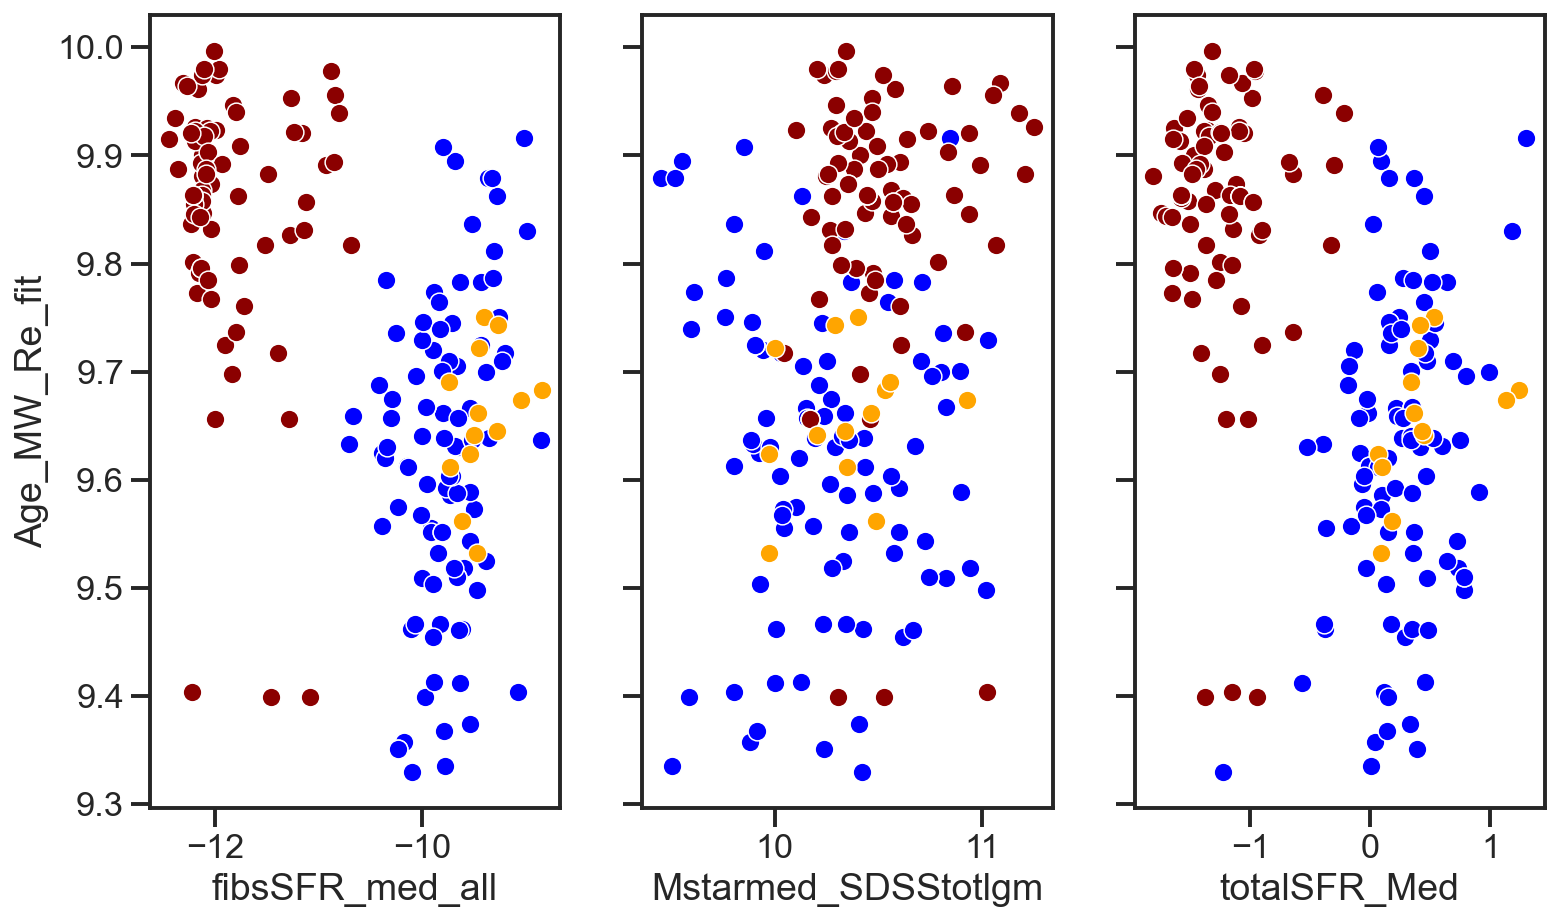

In [85]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(12, 7), sharey=True, dpi=150)

sns.scatterplot('fibsSFR_med_all', 'Age_MW_Re_fit', ax=ax0, color='blue', data=sf_lg12_global_dfv1,)
sns.scatterplot('fibsSFR_med_all', 'Age_MW_Re_fit', ax=ax0, color='darkred', data=qc_lg12_global_dfv1,)
sns.scatterplot('fibsSFR_med_all', 'Age_MW_Re_fit', ax=ax0, color='orange', data=bbrd_global_df,)

sns.scatterplot('Mstarmed_SDSStotlgm', 'Age_MW_Re_fit', ax=ax1, color='blue', data=sf_lg12_global_dfv1,)
sns.scatterplot('Mstarmed_SDSStotlgm', 'Age_MW_Re_fit', ax=ax1, color='darkred', data=qc_lg12_global_dfv1,)
sns.scatterplot('Mstarmed_SDSStotlgm', 'Age_MW_Re_fit', ax=ax1, color='orange', data=bbrd_global_df,)

sns.scatterplot('totalSFR_Med', 'Age_MW_Re_fit', ax=ax2, color='blue', data=sf_lg12_global_dfv1,)
sns.scatterplot('totalSFR_Med', 'Age_MW_Re_fit', ax=ax2, color='darkred', data=qc_lg12_global_dfv1,)
sns.scatterplot('totalSFR_Med', 'Age_MW_Re_fit', ax=ax2, color='orange', data=bbrd_global_df,)

# plt.yscale('log')
# plt.ylim(1e0, 1e2)
# plt.ylim(0, 1)
plt.show()